In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
data = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [7]:
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [8]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [9]:
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [11]:
def preprocess_inputs(df, label_mapping):
    df = df.copy()
    
    # Dropping ID Column Because That Is Unique For Each Shipment & Doesn't Serve Any Process
    df = df.drop('ID', axis=1)
    
    # Dropping Missing Values in Target Rows Of [Shipment Mode] Column as that is our target column and we don't to do prediction on fabricated dat
    
    missing_target_rows = df[df['Shipment Mode'].isna()].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    # Filling Missing values
    df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
    df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())
    
    # Drop Date Column With Too Many Missing Values
    df = df.drop(['PQ First Sent to Client Date','PO Sent to Vendor Date'],axis=1)
    
    # Extract Date Features
    for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + ' Year'] = df[column].apply(lambda x : x.year)
        df[column + ' Month'] = df[column].apply(lambda x : x.month)
        df[column + ' Day'] = df[column].apply(lambda x : x.day)
        df = df.drop(column, axis=1)
        
    # Drop Numeric Columns for too many missing values
    df = df.drop(['Weight (Kilograms)','Freight Cost (USD)'], axis=1)
    
    # Drop High Cardinality Columns
    df = df.drop(['PQ #','PO / SO #','ASN/DN #'], axis=1)
    
    # Binary Encoding
    df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop':0,'From RDC':1})
    df['First Line Designation'] = df[ 'First Line Designation'].replace({'No':0, 'Yes':1})
    
    # One-Hot Encoding
    for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(column, axis=1)
    
    # Splitting The DataFrame into X and y
    y = df['Shipment Mode']
    X = df.drop('Shipment Mode', axis=1)
    
    # Encoding The Labels In Shipment Mode
    y = y.replace(label_mapping)
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [12]:
LABEL_MAPPING = {
    'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3
}

X_train, X_test, y_train, y_test = preprocess_inputs(data, label_mapping=LABEL_MAPPING)

In [13]:
X_train

,Fulfill Via,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
8905,0.975074,-0.228739,-0.426393,-0.442833,-0.365576,-0.221030,0.673216,-0.471452,1.087860,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1414,0.975074,-0.228739,0.198248,0.418854,-0.218907,-0.172736,0.673216,0.702302,-0.994006,0.456201,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1409,0.975074,-0.228739,0.532553,0.366882,-0.309884,-0.203468,0.673216,0.632237,-0.994006,-0.152532,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,4.125612,-0.197963,-0.011975,-0.023956
874,-1.025563,0.291362,-0.450154,-0.274234,2.493413,0.354098,0.673216,-0.278564,-1.410379,-1.674365,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,5.051446,-0.011975,-0.023956
1941,0.975074,-0.618816,0.159722,0.338381,-0.227409,-0.093711,0.673216,0.593803,-0.994006,-0.456899,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-1.025563,-0.228739,-0.407975,-0.436590,-0.377267,-0.225420,-1.485408,-0.467031,1.087860,1.064934,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
7813,0.975074,-0.228739,-0.005566,-0.331187,-0.409364,-0.238591,0.673216,-0.358993,0.255114,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
905,-1.025563,-0.618816,1.611276,2.247912,-0.223796,-0.093711,0.673216,2.497515,-1.410379,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
5192,-1.025563,0.291362,-0.281635,1.413370,1.430592,0.134584,0.673216,2.296044,-0.577633,1.369300,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956


In [14]:
y_train

8905    1
1414    2
1409    2
874     0
1941    2
       ..
2895    3
7813    1
905     0
5192    0
235     0
Name: Shipment Mode, Length: 6974, dtype: int64

In [15]:
y_train.value_counts()

0    4317
1    1950
2     449
3     258
Name: Shipment Mode, dtype: int64

In [16]:
X_train.shape

(6974, 771)

In [19]:
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [20]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(771,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)



Epoch 1/100


175/175 [==============================] - 4s 10ms/step - loss: 0.4460 - accuracy: 0.8315 - val_loss: 0.3333 - val_accuracy: 0.8803
Epoch 2/100
175/175 [==============================] - 1s 8ms/step - loss: 0.2391 - accuracy: 0.9000 - val_loss: 0.2993 - val_accuracy: 0.8803
Epoch 3/100
175/175 [==============================] - 1s 7ms/step - loss: 0.1989 - accuracy: 0.9140 - val_loss: 0.3038 - val_accuracy: 0.8760
Epoch 4/100
175/175 [==============================] - 1s 6ms/step - loss: 0.1826 - accuracy: 0.9220 - val_loss: 0.2973 - val_accuracy: 0.8889
Epoch 5/100
175/175 [==============================] - 1s 7ms/step - loss: 0.1684 - accuracy: 0.9251 - val_loss: 0.3150 - val_accuracy: 0.8867
Epoch 6/100
175/175 [==============================] - 1s 8ms/step - loss: 0.1543 - accuracy: 0.9333 - val_loss: 0.3055 - val_accuracy: 0.8832
Epoch 7/100
175/175 [==============================] - 1s 7ms/step - loss: 0.1466 - accuracy: 0.9342 - val_loss: 0.2947 - val_accuracy: 0

In [21]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

94/94 [==============================] - 0s 3ms/step
Test Set Accuracy: 88.49%


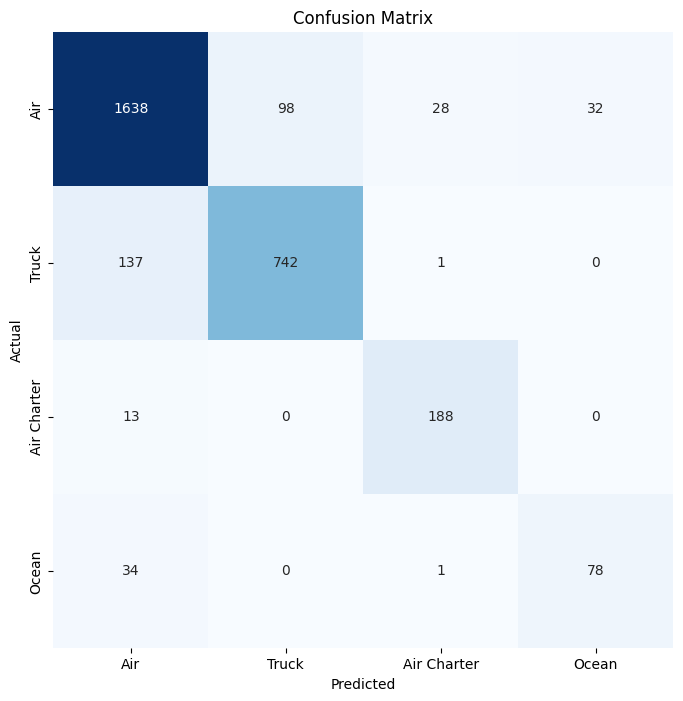

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.90      0.91      0.91      1796
       Truck       0.88      0.84      0.86       880
 Air Charter       0.86      0.94      0.90       201
       Ocean       0.71      0.69      0.70       113

    accuracy                           0.88      2990
   macro avg       0.84      0.85      0.84      2990
weighted avg       0.88      0.88      0.88      2990



In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)